# Data Analysis - Wrangling and first Plots


Oliver Zott / 
08.07.2019

- use Datetime as index
- drop wrong data in "Rainfall"
- cast datatye to rainfall-column
- plot specific year

In [161]:
# Packages
import numpy as np
import pandas as pd
import datetime
from datetime import datetime
import matplotlib.pyplot as plt # for savefig
import re

In [162]:
# 'parse_dates' ...to use the implemented datetiem functionality
# 'dayfirst'  ...to know first int in "01.02.1957" is day - else wrong formating 
df0 = pd.read_csv('rainfall_Stehag.csv', index_col = 'Representative Day', parse_dates=True, dayfirst=True)
df0.head()

From (Date/Time)  Till (Date/Time) Rainfall Quality
Representative Day                                                     
1957-02-01          01.02.1957 06:00  02.02.1957 06:00      0.0       G
1957-02-02          02.02.1957 06:00  03.02.1957 06:00      0.0       G
1957-02-03          03.02.1957 06:00  04.02.1957 06:00      0.0       G
1957-02-04          04.02.1957 06:00  05.02.1957 06:00      0.0       G
1957-02-05          05.02.1957 06:00  06.02.1957 06:00      0.0       G

## Clean Data from wrong values

In [163]:
df0.Rainfall.head(10)

Representative Day
1957-02-01       0.0
1957-02-02       0.0
1957-02-03       0.0
1957-02-04       0.0
1957-02-05       0.0
1957-02-06       0.0
1957-02-07       0.0
1957-02-08       8.0
1957-02-09    08.Mär
1957-02-10       0.0
Name: Rainfall, dtype: object

In [164]:
display(type(df0.Rainfall))
display(type(df0.Rainfall[1]))
display(df0.shape)

pandas.core.series.Series

str

(22581, 4)

In [165]:
# df.Rainfall.replace('[a-zA-Z]$', 0, regex = True)
df2 = df0.replace('[a-zA-Z]$', np.nan, regex = True)
df2.head()

df = df2.Rainfall.astype(np.float64)
df.head(10)

Representative Day
1957-02-01    0.0
1957-02-02    0.0
1957-02-03    0.0
1957-02-04    0.0
1957-02-05    0.0
1957-02-06    0.0
1957-02-07    0.0
1957-02-08    8.0
1957-02-09    NaN
1957-02-10    0.0
Name: Rainfall, dtype: float64

## Some Plots

Plot used: pandas.DataFrame.plot

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot

- grid
- figsize
- savefig

Text(0, 0.5, 'Rainfall [mm]')

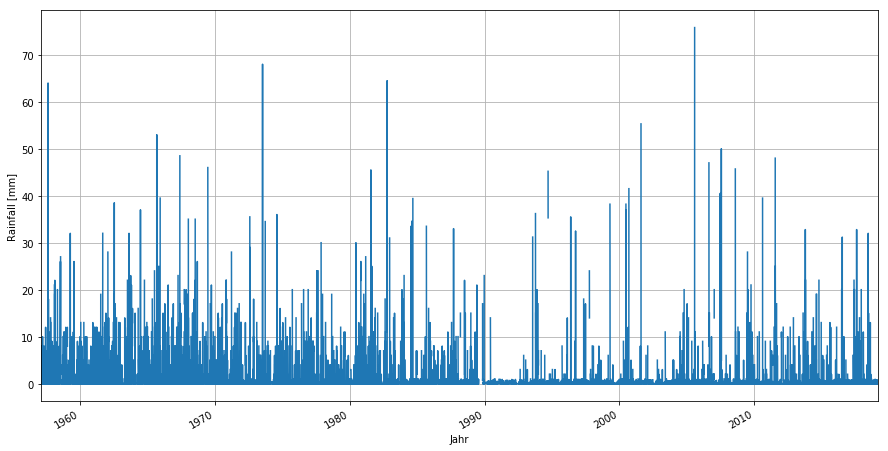

In [166]:
ax = df.plot(y = 'Rainfall',grid=True, figsize=(15,8))
ax.set_xlabel("Jahr")
ax.set_ylabel("Rainfall [mm]")

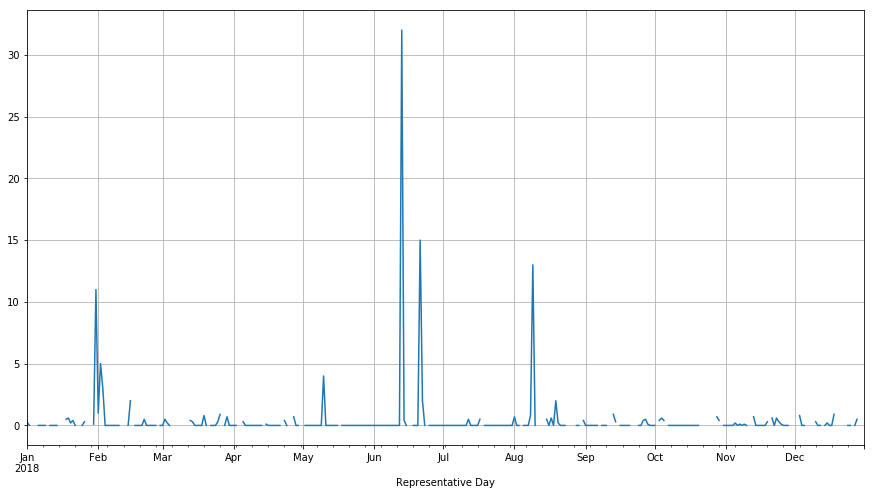

In [167]:
df_2018 = df.loc['2018']

fig = df_2018.plot(y = 'Rainfall',grid=True, figsize=(15,8))
plt.savefig("data/2018_overview.png")

In [168]:
df_2018.max()

32.0

In [169]:
df_2018.loc['2018-02'].head()

Representative Day
2018-02-01    1.0
2018-02-02    5.0
2018-02-03    3.0
2018-02-04    0.0
2018-02-05    0.0
Name: Rainfall, dtype: float64

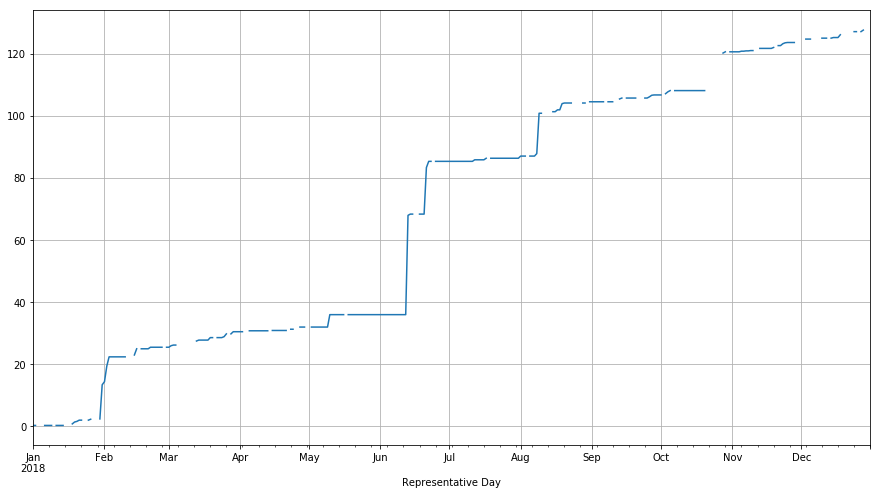

In [170]:
# Summenfunktion 
df_sum = df_2018.cumsum()

# display(df_sum)
df_2018
fig = df_sum.plot(figsize=(15,8), grid = True)

### Next Plot - Steps

group data: e.g.: year - month - day 
goal:

- compare cumsum over all years
- compare rainfall-aggregation of all years
- compare max month of each year (is there month with max rainfall?)

## Resampling



In [171]:
# 1. split Timestamp to year-month-day columns to get full Dataframe

df0.index

DatetimeIndex(['1957-02-01', '1957-02-02', '1957-02-03', '1957-02-04',
               '1957-02-05', '1957-02-06', '1957-02-07', '1957-02-08',
               '1957-02-09', '1957-02-10',
               ...
               '2019-02-19', '2019-02-20', '2019-02-21', '2019-02-22',
               '2019-02-23', '2019-02-24', '2019-02-25', '2019-02-26',
               '2019-02-27', '2019-02-28'],
              dtype='datetime64[ns]', name='Representative Day', length=22581, freq=None)

In [177]:
df_month_mean = df.resample('M').mean()
df_year_sum = df.resample('AS-JAN').sum()
df_month_max = df.resample('M').max()

display(df_year_sum.head())
display(df_month_mean.head())
display(df.loc['1958'].sum())


Representative Day
1957-01-01    440.3
1958-01-01    466.6
1959-01-01    323.7
1960-01-01    293.9
1961-01-01    346.9
Freq: AS-JAN, Name: Rainfall, dtype: float64

Representative Day
1957-02-28    1.140909
1957-03-31    0.827586
1957-04-30    0.344828
1957-05-31    0.724138
1957-06-30    1.362069
Freq: M, Name: Rainfall, dtype: float64

466.6

Text(0, 0.5, 'Total Rainfall [mm]')

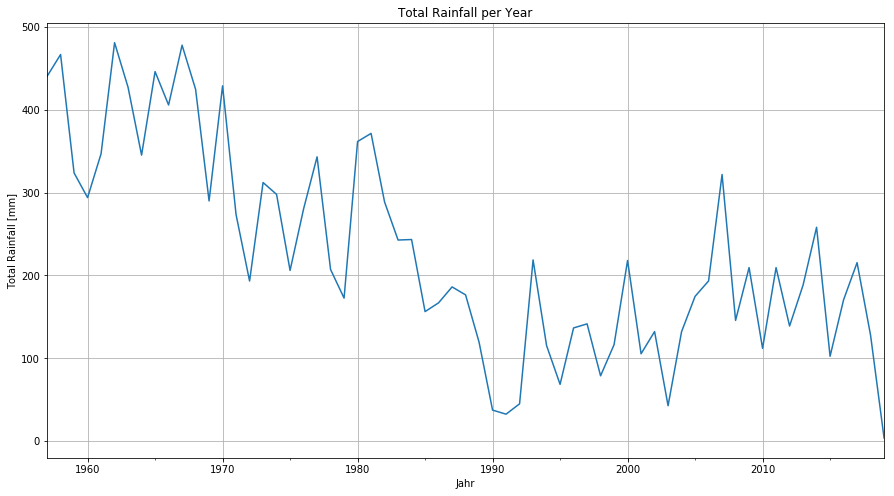

In [173]:
fig = df_year_sum.plot(figsize=(15,8), grid = True, title = 'Total Rainfall per Year')
fig.set_xlabel("Jahr")
fig.set_ylabel("Total Rainfall [mm]")

Text(0, 0.5, 'Mean Rainfall [mm]')

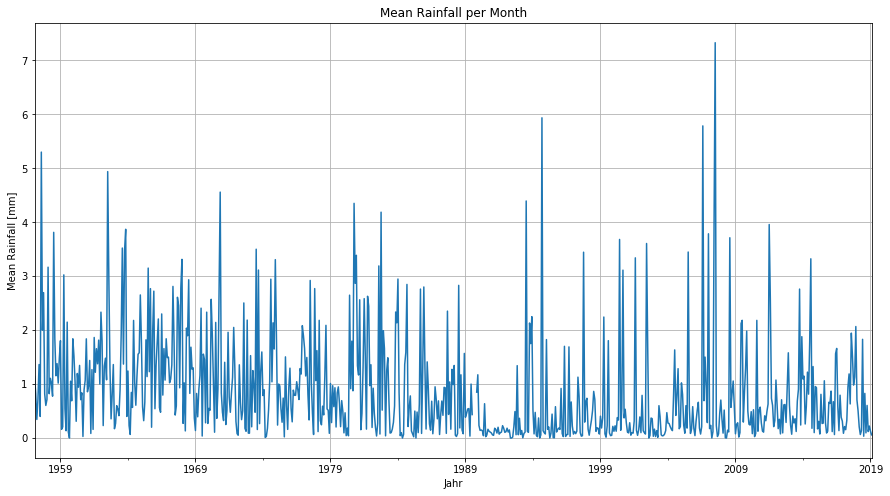

In [174]:
fig = df_month_mean.plot(figsize=(15,8), grid = True, title = 'Mean Rainfall per Month')
fig.set_xlabel("Jahr")
fig.set_ylabel("Mean Rainfall [mm]")